In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
df = pd.read_csv(r'\Users\joede\workspace\c11\Python\Projects\Wego\headway_data.csv')

In [16]:
df.shape

(350329, 36)

In [17]:
df.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_PARSED,TIME_POINT_ABBR_PARSED,SCHEDULED_TIME_PARSED,ACTUAL_ARRIVAL_TIME_PARSED,ACTUAL_DEPARTURE_TIME_PARSED,ADJUSTED_ONTIME_COUNT_PARSED
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,6.500000,NaN,2023-08-01,NaT,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,1970-01-01 00:00:00.000000001
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,0.000000,NaN,2023-08-01,NaT,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,1970-01-01 00:00:00.000000001
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,0.000000,NaN,2023-08-01,NaT,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,1970-01-01 00:00:00.000000001
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0.000000,NaN,2023-08-01,NaT,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,1970-01-01 00:00:00.000000001
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0.0,0,12.866666,5.0,2023-08-01,NaT,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,1970-01-01 00:00:00.000000001


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   CALENDAR_ID                   350329 non-null  int64         
 1   SERVICE_ABBR                  350329 non-null  int64         
 2   ADHERENCE_ID                  350329 non-null  int64         
 3   DATE                          350329 non-null  datetime64[ns]
 4   ROUTE_ABBR                    350329 non-null  int64         
 5   BLOCK_ABBR                    350329 non-null  int64         
 6   OPERATOR                      350329 non-null  int64         
 7   TRIP_ID                       350329 non-null  int64         
 8   OVERLOAD_ID                   350329 non-null  int64         
 9   ROUTE_DIRECTION_NAME          350329 non-null  object        
 10  TIME_POINT_ABBR               350329 non-null  object        
 11  ROUTE_STOP_SE

In [19]:
date_cols = ['DATE', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'SCHEDULED_TIME']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [21]:
num_cols = ['ADHERENCE', 'HDWY_DEV', 'SCHEDULED_HDWY', 'ACTUAL_HDWY',
            'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES',
            'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [23]:
df = df.dropna(subset=['ADHERENCE'])

<Axes: >

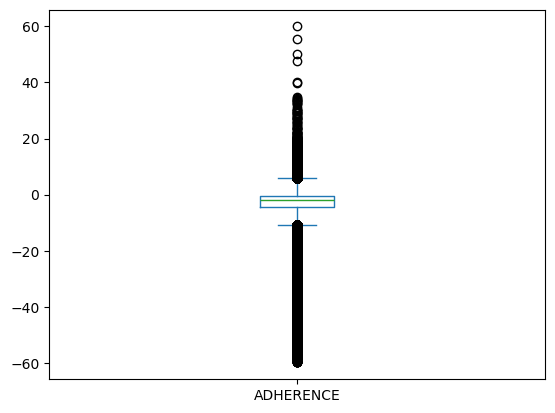

In [26]:
df['ADHERENCE'].plot(kind='box')

In [25]:
df = df[(df['ADHERENCE'] > -60) & (df['ADHERENCE'] < 60)]

In [27]:
df = df[(df['SCHEDULED_HDWY'] > 0) & (df['SCHEDULED_HDWY'] < 90)]
df = df[(df['ACTUAL_HDWY'] >= 0) & (df['ACTUAL_HDWY'] < 120)]

In [28]:
df = df[(df['HDWY_DEV'] > -30) & (df['HDWY_DEV'] < 60)]